In [60]:
import sagemaker

role = sagemaker.get_execution_role()


In [61]:
sess=sagemaker.Session()

In [3]:
import tarfile
with tarfile.open('model.tar.gz', 'w:gz') as f:
    f.add('ModelV3_BLUE_score_47.pt', arcname='model.pt')

In [8]:
prefix='June15-HusnainModel'

In [11]:
model_location = sess.upload_data('model.tar.gz', key_prefix=prefix,bucket='client-chang')
model_location

's3://client-chang/June15-HusnainModel/model.tar.gz'

In [62]:
model_location='s3://client-chang/June15-HusnainModel/model.tar.gz'

In [63]:
# This is from link shared by Dhao

from sagemaker.predictor import Predictor

jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )


In [86]:

from sagemaker.pytorch import PyTorchModel

model = PyTorchModel(
    model_data=model_location,
    source_dir="code",
    entry_point="inference.py",
    role=role,
    framework_version="1.4.0",
    py_version="py3",
    predictor_cls=ImagePredictor)

In [ ]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m5.large')


-------------

In [66]:
predictor = model.deploy(initial_instance_count=1, instance_type='local')


Attaching to 7h2xa1u56k-algo-1-zc6hj
7h2xa1u56k-algo-1-zc6hj | Collecting torch==1.8.1
7h2xa1u56k-algo-1-zc6hj |   Downloading torch-1.8.1-cp36-cp36m-manylinux1_x86_64.whl (804.1 MB)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



7h2xa1u56k-algo-1-zc6hj | Collecting torchvision==0.9.1
7h2xa1u56k-algo-1-zc6hj |   Downloading torchvision-0.9.1-cp36-cp36m-manylinux1_x86_64.whl (17.4 MB)
     |████████████████████████████████| 17.4 MB 37.6 MB/s eta 0:00:01
7h2xa1u56k-algo-1-zc6hj | Requirement already satisfied: numpy in /opt/conda/lib/python3.6/site-packages (from torch==1.8.1->-r /opt/ml/model/code/requirements.txt (line 1)) (1.16.4)
7h2xa1u56k-algo-1-zc6hj | Collecting dataclasses
7h2xa1u56k-algo-1-zc6hj |   Downloading dataclasses-0.8-py3-none-any.whl (19 kB)
7h2xa1u56k-algo-1-zc6hj | Collecting typing-extensions
7h2xa1u56k-algo-1-zc6hj |   Downloading typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
7h2xa1u56k-algo-1-zc6hj | Requirement already satisfied: pillow>=4.1.1 in /opt/conda/lib/python3.6/site-packages (from torchvision==0.9.1->-r /opt/ml/model/code/requirements.txt (line 2)) (7.1.0)
7h2xa1u56k-algo-1-zc6hj | Installing collected packages: typing-extensions, dataclasses, torch, torchvision
7h2xa1u56

In [21]:

urls = {
    "British Shorthair": "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Britishblue.jpg/800px-Britishblue.jpg",
    "English Cocker Spaniel": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/16105011/English-Cocker-Spaniel-Slide03.jpg",
    "Shiba Inu": "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Taka_Shiba.jpg/1200px-Taka_Shiba.jpg",
    "German Shorthaired": "https://vetstreet.brightspotcdn.com/dims4/default/232fcc6/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fda%2Fa44590a0d211e0a2380050568d634f%2Ffile%2FGerman-Shorthair-Pointer-2-645mk062111.jpg",
}

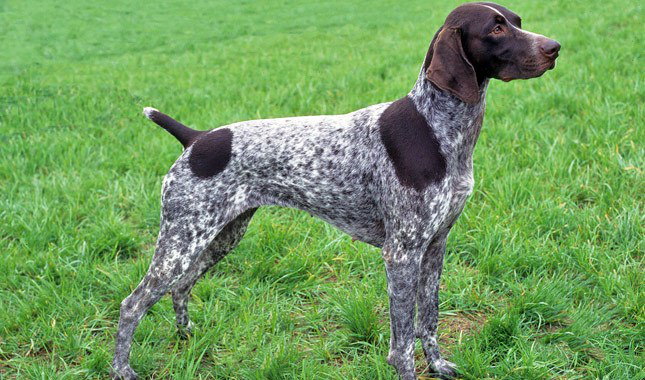

In [27]:
import random
import requests
from PIL import Image
import io
random_pet = random.choice(list(urls))
random_pet_url = urls[random_pet]
img_bytes = requests.get(random_pet_url).content
img =Image.open(io.BytesIO(img_bytes))
display(img)


In [67]:
request_dict={ "url": "https://cdn1-www.cattime.com/assets/uploads/2011/12/file_2744_british-shorthair-460x290-460x290.jpg" }
img_bytes = requests.get(request_dict['url']).content
type(img_bytes)

bytes

In [73]:
test_img_path='test1.jpg'

In [72]:
!ls

code			     model_test.py	       reverse_vocab.json
june15_husnain_deploy.ipynb  ModelV3_BLUE_score_47.pt  test1.jpg
model.tar.gz		     Model_v3.py	       test2.jpg
Model_test.ipynb	     __pycache__


In [76]:
test_img=bytes(Image.open(test_img_path))

TypeError: cannot convert 'JpegImageFile' object to bytes

In [75]:
type(test_img)

PIL.JpegImagePlugin.JpegImageFile

In [31]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

In [32]:
predictor.serializer=jpeg_serializer

In [68]:
predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:33,221 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Deserializing the input data.
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:33,221 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Request body CONTENT-TYPE is: image/jpeg
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:33,221 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Request body TYPE is: <class 'bytearray'>
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:33,228 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Calling model
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:34,245 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Serializing the generated output.
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:16:34,245 [INFO ] W-model-5-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Returning response "\\sum_{i=1}^{\\infty}\\frac{k_1}{{a}\\frac{\\pi}{2}\\cos/(y)^{-1}5/29"
7h2xa1u56k-algo-1-zc6hj | 2021-06-15 13:

'\\sum_{i=1}^{\\infty}\\frac{k_1}{{a}\\frac{\\pi}{2}\\cos/(y)^{-1}5/29'